In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os

In [2]:
import requests
import json
import pandas as pd 
import time # if you want to measure the query speed

In [3]:
anns = pd.read_table(f'Add_files/gtex_annotation/g_tex_ann.txt', sep = '\t')

In [4]:
anns

,variant_id,chr,variant_pos,ref,alt,num_alt_per_site,rs_id_dbSNP151_GRCh38p7,variant_id_b37
0,chr1_13526_C_T_b38,chr1,13526,C,T,1,rs1209314672,1_13526_C_T_b37
1,chr1_13550_G_A_b38,chr1,13550,G,A,1,rs554008981,1_13550_G_A_b37
2,chr1_14451_CTCT_C_b38,chr1,14451,CTCT,C,1,.,1_14451_CTCT_C_b37
3,chr1_14469_C_T_b38,chr1,14469,C,T,1,rs1365462007,1_14469_C_T_b37
4,chr1_14470_G_A_b38,chr1,14470,G,A,1,rs1385614989,1_14470_G_A_b37
...,...,...,...,...,...,...,...,...
46569699,chrX_156029674_G_A_b38,chrX,156029674,G,A,1,rs1017605649,X_155259339_G_A_b37
46569700,chrX_156029747_C_T_b38,chrX,156029747,C,T,1,rs1274751169,X_155259412_C_T_b37
46569701,chrX_156029764_A_C_b38,chrX,156029764,A,C,1,rs1488455828,X_155259429_A_C_b37
46569702,chrX_156029823_G_A_b38,chrX,156029823,G,A,1,rs373175643,X_155259488_G_A_b37


In [5]:
cwd = os.getcwd() 
lists = os.listdir(f'{cwd}/GWAS')
lists = [i.replace('.xlsx', '') for i in lists]
gwas = {}
for i in lists:
    gwas[i] = pd.read_excel(f'GWAS/{i}.xlsx')

In [6]:
for k, v in gwas.items():
    gwas[k]['RSID'] = gwas[k]['RSID'].replace(',chr.+[AGTC]', '', regex = True)
    #gwas[k]['RSID'] = gwas[k]['RSID'].replace(';rs\d+', '', regex = True)

In [7]:
gwases = pd.DataFrame()
for k, v in gwas.items():
    gwas[k]['Source'] = k
    gwases = pd.concat([gwases, gwas[k]])
    

In [8]:
gwases.head()

,#CHROM,POS,ID,REF,ALT,A1,FIRTH?,TEST,OBS_CT,OR,...,U95,Z_STAT,P,ERRCODE,RSID,GENE_NAME,Source,BETA,SE,T_STAT
0,8,118856825,chr8:118856825:G:A,G,A,A,N,ADD,3917,0.382619,...,0.552351,-5.12870,2.917430e-07,.,rs150526800,EXT1,DSM субклиническая депрессия logistic.top1000_new,NaN,NaN,NaN
1,16,47424828,chr16:47424828:T:C,T,C,C,N,ADD,3917,1.314710,...,1.461290,5.07340,3.907630e-07,.,rs4966882,ITFG1,DSM субклиническая депрессия logistic.top1000_new,NaN,NaN,NaN
2,16,47486817,chr16:47486817:C:T,C,T,T,N,ADD,3917,1.312350,...,1.459740,5.00524,5.579200e-07,.,rs2111227,ITFG1,DSM субклиническая депрессия logistic.top1000_new,NaN,NaN,NaN
3,2,197913359,chr2:197913359:T:G,T,G,G,N,ADD,3917,0.730470,...,0.826125,-5.00219,5.668180e-07,.,rs10931769,ANKRD44,DSM субклиническая депрессия logistic.top1000_new,NaN,NaN,NaN
4,2,197910266,chr2:197910266:C:T,C,T,T,N,ADD,3917,0.732074,...,0.827948,-4.96682,6.805920e-07,.,rs62279184,ANKRD44,DSM субклиническая депрессия logistic.top1000_new,NaN,NaN,NaN


In [9]:
gwases[gwases['RSID']=='rs4966882']

,#CHROM,POS,ID,REF,ALT,A1,FIRTH?,TEST,OBS_CT,OR,...,U95,Z_STAT,P,ERRCODE,RSID,GENE_NAME,Source,BETA,SE,T_STAT
1,16,47424828,chr16:47424828:T:C,T,C,C,N,ADD,3917,1.31471,...,1.46129,5.07340,3.907630e-07,.,rs4966882,ITFG1,DSM субклиническая депрессия logistic.top1000_new,NaN,NaN,NaN
57,16,47424828,chr16:47424828:T:C,T,C,C,N,ADD,4520,1.22661,...,1.34359,4.39487,1.108370e-05,.,rs4966882,ITFG1,ангедония logistic.top1000_new,NaN,NaN,NaN


In [10]:
lists

['DSM субклиническая депрессия logistic.top1000_new',
 'DSM_БАР logistic.top1000_new',
 'DSM_ГТР logistic.top1000_new',
 'DSM_ДЕПРЕССИЯ logistic.top1000_new',
 'HADS_A. БАЛЛ linear.top1000_new',
 'HADS_A_КАТЕГОРИЯ logistic.top1000_new',
 'HADS_D. БАЛЛ linear.top1000_new',
 'HADS_D_КАТЕГОРИЯ logistic.top1000_new',
 'HADS_D_субклиническая депрессия logistic.top1000_new',
 'ангедония logistic.top1000_new',
 'гиперсомния logistic.top1000_new',
 'гиперсомния плюс гиперфагия logistic.top1000_new',
 'гиперфагия logistic.top1000_new',
 'любой фенотип logistic.top1000_new']

In [11]:
unique_ID=[]
import re
import ensembl_rest
for i in lists:
    df = gwas[i]
    significant_rs = df[df['P'] < 1e-5 ]
    #significant_rs = df
    unique_ID_prom = significant_rs['RSID'].unique()
    unique_ID_prom = [gene for gene in unique_ID_prom if gene != 'intergenic']
    for j in unique_ID_prom:
        if j not in unique_ID:
            j = re.sub(':', '_', j)
            j = j 
            unique_ID.append(j)

In [12]:
unique_ID = tuple(unique_ID)

In [13]:
unique_ID

('rs150526800',
 'rs4966882',
 'rs2111227',
 'rs10931769',
 'rs62279184',
 'rs4850750',
 'rs62279185',
 'rs12467178',
 'rs17863710',
 'rs2203232',
 'rs77737456',
 'rs60350507',
 'rs60063073',
 'rs2421057',
 'rs4921514',
 'rs116735059',
 'rs7675890',
 'rs9306953',
 'rs10517456',
 'rs2380955',
 'rs13121101;rs13121101',
 'rs13106860',
 'rs13107094',
 'rs74540240',
 'rs28842796',
 'rs78422124',
 'rs4008685',
 'rs80007114',
 'rs7131513',
 'rs79332573',
 'rs60143203',
 'rs118055763',
 'rs35594408',
 'rs35155333',
 'rs35049902',
 'rs977173',
 'rs2129924',
 'rs2129925',
 'rs10517458',
 'rs6838929',
 'rs977174',
 'rs61430982',
 'rs144169556',
 'rs80137488',
 'rs74607742',
 'rs442266',
 'rs75595114',
 'rs11735929',
 'rs11947030',
 'rs2890553',
 'rs2324414',
 'rs199892257',
 'rs6531597',
 'rs7660926',
 'rs4525987',
 'rs7683553',
 'rs9306954',
 'rs11096916,rs578219424;rs11096916',
 'rs11096917',
 'rs9968520',
 'rs2111910',
 'rs7691785',
 'rs11152958',
 'rs2324415',
 'rs956728',
 'rs61824224',
 'rs

In [14]:
to_gtex=anns[anns['rs_id_dbSNP151_GRCh38p7'].isin(list(unique_ID))]['variant_id'].to_list()

In [15]:
len(tuple(to_gtex))

1020

         snpId     pos snpIdUpper             variantId geneSymbol  \
249  rs7131513  500278  RS7131513  chr11_500278_C_T_b38       RNH1   
106  rs7131513  500278  RS7131513  chr11_500278_C_T_b38       RNH1   
194  rs7131513  500278  RS7131513  chr11_500278_C_T_b38       RNH1   
7    rs7131513  500278  RS7131513  chr11_500278_C_T_b38       RNH1   
69   rs7131513  500278  RS7131513  chr11_500278_C_T_b38       RNH1   

           pValue geneSymbolUpper datasetId          tissueSiteDetailId  \
249  7.892830e-82            RNH1   gtex_v8             Muscle_Skeletal   
106  8.321510e-68            RNH1   gtex_v8  Skin_Sun_Exposed_Lower_leg   
194  1.562170e-58            RNH1   gtex_v8            Esophagus_Mucosa   
7    8.795900e-46            RNH1   gtex_v8  Cells_Cultured_fibroblasts   
69   1.011730e-41            RNH1   gtex_v8                 Whole_Blood   

             ontologyId chromosome           gencodeId       nes  \
249      UBERON:0011907      chr11  ENSG00000023191.16  0.89

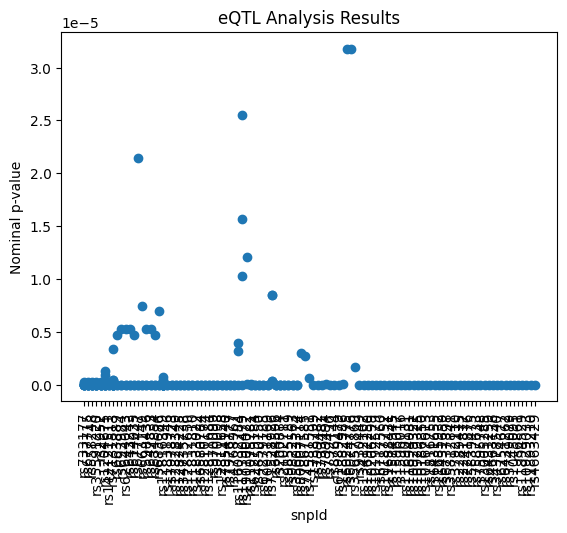

In [29]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import random
# Параметры запроса
#gencode = "ENSG00000227232.5"
#tissue = "Lung"
variantId = tuple(to_gtex[0:990])
#variantId = unique_ID[8]
# Выполнение запроса к API GTEx V2 https://gtexportal.org/api/v2/
response = requests.get('https://gtexportal.org/api/v2/association/singleTissueSqtl',
                        params = {"datasetId" : "gtex_v8", "variantId" : variantId})

# Проверка статуса ответа
if response.status_code != 200:
    print(f"Error: API request failed with status code {response.status_code}")
else:
    try:
        # Преобразование данных в формат JSON
        data = response.json()
        
        # Проверка на наличие данных
        if 'data' not in data or not data['data']:
            print("No data available for the given parameters.")
        else:
            # Преобразование данных в DataFrame
            eqtl_data = pd.DataFrame(data['data'])

            # Сортировка данных по p-value
            eqtl_data_sorted = eqtl_data.sort_values(by='pValue')

            # Отображение самых значимых eQTL
            print(eqtl_data_sorted.head())

            # Визуализация p-value
            plt.scatter(eqtl_data['snpId'], eqtl_data['pValue'])
            plt.xlabel('snpId')
            plt.ylabel('Nominal p-value')
            plt.title('eQTL Analysis Results')
            plt.xticks(rotation=90)
            plt.show()
    except json.JSONDecodeError:
        print("Error: Unable to decode JSON response.")



In [30]:
eqtl_data_sorted

,snpId,pos,snpIdUpper,variantId,geneSymbol,pValue,geneSymbolUpper,datasetId,tissueSiteDetailId,ontologyId,chromosome,gencodeId,nes,phenotypeId
249,rs7131513,500278,RS7131513,chr11_500278_C_T_b38,RNH1,7.892830e-82,RNH1,gtex_v8,Muscle_Skeletal,UBERON:0011907,chr11,ENSG00000023191.16,0.898721,chr11:502181:507113:clu_5818:ENSG00000023191.16
106,rs7131513,500278,RS7131513,chr11_500278_C_T_b38,RNH1,8.321510e-68,RNH1,gtex_v8,Skin_Sun_Exposed_Lower_leg,UBERON:0004264,chr11,ENSG00000023191.16,0.914437,chr11:502181:507113:clu_6724:ENSG00000023191.16
194,rs7131513,500278,RS7131513,chr11_500278_C_T_b38,RNH1,1.562170e-58,RNH1,gtex_v8,Esophagus_Mucosa,UBERON:0006920,chr11,ENSG00000023191.16,0.991339,chr11:502181:507113:clu_5950:ENSG00000023191.16
7,rs7131513,500278,RS7131513,chr11_500278_C_T_b38,RNH1,8.795900e-46,RNH1,gtex_v8,Cells_Cultured_fibroblasts,UBERON:EFO_0002009,chr11,ENSG00000023191.16,0.878630,chr11:502181:507113:clu_5485:ENSG00000023191.16
69,rs7131513,500278,RS7131513,chr11_500278_C_T_b38,RNH1,1.011730e-41,RNH1,gtex_v8,Whole_Blood,UBERON:0013756,chr11,ENSG00000023191.16,0.721021,chr11:502181:507113:clu_5190:ENSG00000023191.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,rs117390479,56346633,RS117390479,chr20_56346633_G_A_b38,FAM210B,1.570650e-05,FAM210B,gtex_v8,Cells_Cultured_fibroblasts,UBERON:EFO_0002009,chr20,ENSG00000124098.9,0.601668,chr20:56359191:56360182:clu_24825:ENSG00000124...
126,rs677447,64118232,RS677447,chr11_64118232_C_T_b38,TEX40,2.144980e-05,TEX40,gtex_v8,Skin_Sun_Exposed_Lower_leg,UBERON:0004264,chr11,ENSG00000219435.5,0.266420,chr11:64300987:64303773:clu_8191:ENSG000002194...
198,rs117390479,56346633,RS117390479,chr20_56346633_G_A_b38,FAM210B,2.550900e-05,FAM210B,gtex_v8,Esophagus_Mucosa,UBERON:0006920,chr20,ENSG00000124098.9,-0.665361,chr20:56359191:56365087:clu_28978:ENSG00000124...
160,rs6024776,56298681,RS6024776,chr20_56298681_C_G_b38,FAM210B,3.178550e-05,FAM210B,gtex_v8,Skin_Sun_Exposed_Lower_leg,UBERON:0004264,chr20,ENSG00000124098.9,-0.364044,chr20:56359191:56365087:clu_31855:ENSG00000124...


In [31]:
eqtl_data_sorted['tissueSiteDetailId'].unique()

array(['Muscle_Skeletal', 'Skin_Sun_Exposed_Lower_leg',
       'Esophagus_Mucosa', 'Cells_Cultured_fibroblasts', 'Whole_Blood',
       'Spleen', 'Prostate', 'Brain_Putamen_basal_ganglia',
       'Brain_Hippocampus', 'Brain_Substantia_nigra'], dtype=object)

In [32]:
eqtl_data_sorted['geneSymbol'].unique()

array(['RNH1', 'CD46', 'TPRG1', 'TFCP2', 'CD27-AS1', 'PITRM1', 'ATG16L1',
       'SLC11A2', 'MRPL51', 'ANKRD44', 'RP5-858L17.1', 'RP5-968J1.1',
       'FAM210B', 'TAPBPL', 'VEGFB', 'MTSS1L', 'ANO9', 'FAM177A1',
       'RP11-298A10.1', 'RP11-61L23.2', 'DEAF1', 'ERICH1', 'SPG7',
       'ELOVL7', 'RASSF7', 'TEX40'], dtype=object)

# В каких тканях значимо экспрессируются отобранные hit-snps?

<Axes: >

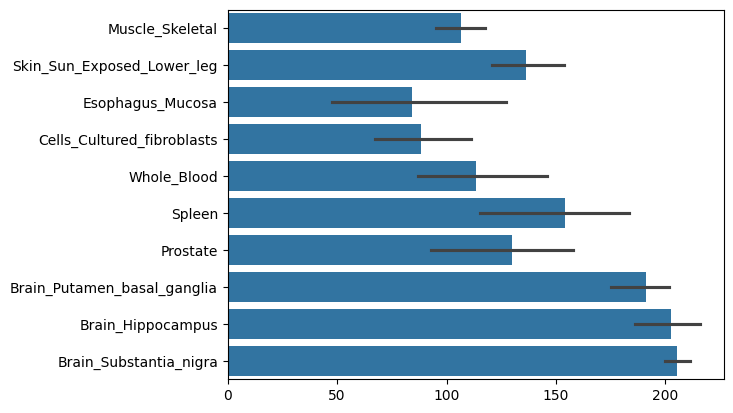

In [20]:
sns.barplot(eqtl_data_sorted.tissueSiteDetailId.values)

# Какие фенотипы имеют значимые snps, имеющие высокую экспрессию тканях головного мозга?

In [21]:
tissues = ['Brain_Putamen_basal_ganglia',
       'Brain_Hippocampus', 'Brain_Substantia_nigra']

In [23]:
snps_brain = eqtl_data_sorted[eqtl_data_sorted['tissueSiteDetailId'].isin(tissues)]['snpId'].to_list()

In [26]:
set(gwases[gwases['RSID'].isin(snps_brain)]['Source'].to_list())

{'DSM субклиническая депрессия logistic.top1000_new',
 'DSM_ГТР logistic.top1000_new',
 'HADS_D. БАЛЛ linear.top1000_new',
 'HADS_D_КАТЕГОРИЯ logistic.top1000_new',
 'HADS_D_субклиническая депрессия logistic.top1000_new',
 'любой фенотип logistic.top1000_new'}